In [1]:
import numpy as np
import pandas as pd

In [2]:
import os
os.getcwd()

"""
Checking that the directory I'm working in is correct
"""

'/Users/timotheeduverne/Documents/GitHub/Test-Tim/data-labs/module-1/pandas-project/your-code'

In [122]:
df=pd.read_csv('/Users/timotheeduverne/Downloads/GSAF5.csv',engine='python')

"""
Specifying the parsing engine allowed me to overcome the initial error when
reading the csv file, since the python based parser is more feature rich.
No need to specify the separator since commas are the default separators, as in our file.
"""

'\nSpecifying the parsing engine allowed me to overcome the initial error when\nreading the csv file, since the python based parser is more feature rich.\nNo need to specify the separator since commas are the default separators, as in our file.\n'

In [7]:
df.head(5)

"""
Just to check out the general aspect of the dataset
Allowed me to get a glimpse of some aspects that I will need to clean

It seems for instance that the "href" and "href formula" columns are identical
"""

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2016.09.18.c,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,...,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.c-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.c,2016.09.18.c,5993,NaN,NaN
1,2016.09.18.b,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,Chucky Luciano,M,...,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.b-Luciano.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.b,2016.09.18.b,5992,NaN,NaN
2,2016.09.18.a,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,...,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.a-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.a,2016.09.18.a,5991,NaN,NaN
3,2016.09.17,17-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Thirteenth Beach,Surfing,Rory Angiolella,M,...,NaN,"The Age, 9/18/2016",2016.09.17-Angiolella.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.17,2016.09.17,5990,NaN,NaN
4,2016.09.15,16-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Bells Beach,Surfing,male,M,...,2 m shark,"The Age, 9/16/2016",2016.09.16-BellsBeach.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.16,2016.09.15,5989,NaN,NaN


In [8]:
df.info()

"""
basic analysis of the contents of each column
"""

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5992 entries, 0 to 5991
Data columns (total 24 columns):
Case Number               5992 non-null object
Date                      5992 non-null object
Year                      5992 non-null int64
Type                      5992 non-null object
Country                   5949 non-null object
Area                      5590 non-null object
Location                  5496 non-null object
Activity                  5465 non-null object
Name                      5792 non-null object
Sex                       5425 non-null object
Age                       3311 non-null object
Injury                    5965 non-null object
Fatal (Y/N)               5973 non-null object
Time                      2779 non-null object
Species                   3058 non-null object
Investigator or Source    5977 non-null object
pdf                       5992 non-null object
href formula              5991 non-null object
href                      5989 non-null object
C

Obviously the 2 last columns are useless and should be dropped

In [11]:
df.shape

"""
shows the dimensions of the data set
"""

(5992, 24)

In [123]:
"""
Now we should at least clean the data set from the useless blank spaces
at the beginning and end of each string element in the set.
"""
for col in df.select_dtypes([np.object]):
    df[col] = df[col].str.strip(" \".")

In [13]:
print(df.describe())

"""
basic analysis of the numerical contents of the entire table --> USELESS
"""

              Year  original order
count  5992.000000     5992.000000
mean   1925.204606     2997.548899
std     286.473712     1729.860210
min       0.000000        2.000000
25%    1942.000000     1499.750000
50%    1975.000000     2997.500000
75%    2003.000000     4495.250000
max    2016.000000     5993.000000


'\nbasic analysis of the numerical contents of the entire table --> USELESS\n'

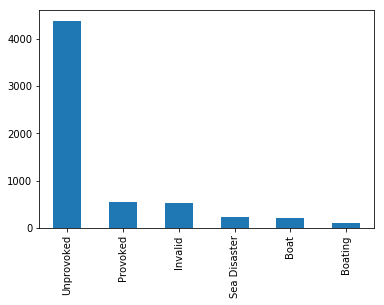

In [32]:
df.Type.value_counts().plot.bar()
"""
There are a few mistakes in this data. The background info from the Global Shark
Attack File explains that the goal is to better understand these attacks
and allow for a more peaceful cohabitation.
The possible answers to this question should probably be Provoked/Unprovoked
or stay empty in other cases
"""

AxesSubplot(0.125,0.125;0.775x0.755)


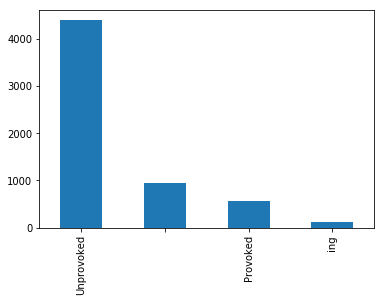

In [124]:
df.Type=df.Type.str.replace("Invalid",'')
df.Type=df.Type.str.replace("Sea Disaster",'')
df.Type=df.Type.str.replace("Boat",'')
df.Type=df.Type.str.replace("Boating",'')
print(df.Type.value_counts().plot.bar())

AxesSubplot(0.125,0.125;0.775x0.755)


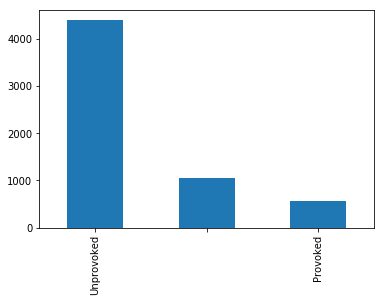

In [125]:
"""
Obviously I should have started with 'Boating' instead of 'Boat'
I kept it this way in order to show my mistake. It can easily be corrected.
After correcting, this column seems clean and usable.
"""
df.Type=df.Type.str.replace("ing",'')
print(df.Type.value_counts().plot.bar())

In [ ]:
# Homogenize column names

In [115]:
# Drop duplicates

before=len(df)
df=df.drop_duplicates()
after=len(df)
print("Nb of duplicates dropped:", str(before-after))

Nb of duplicates dropped: 0


In [21]:
df.columns[df.isnull().sum()>0]

"""
Returns all column names where at least one line is empty
"""

Index(['Country', 'Area', 'Location', 'Activity', 'Name', 'Sex ', 'Age',
       'Injury', 'Fatal (Y/N)', 'Time', 'Species ', 'Investigator or Source',
       'href formula', 'href', 'Unnamed: 22', 'Unnamed: 23'],
      dtype='object')

In [25]:
df.isnull().head(5)

"""
Even though the Species colum seems often empty, it would probably be a mistake to discard it.
It seems normal that the species would not always be identified.
"""

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,True,True
1,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,True,True
2,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,True,True
3,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,True,True
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True


In [26]:
df.isnull().sum()

Case Number                  0
Date                         0
Year                         0
Type                         0
Country                     43
Area                       402
Location                   496
Activity                   527
Name                       200
Sex                        567
Age                       2681
Injury                      27
Fatal (Y/N)                 19
Time                      3213
Species                   2934
Investigator or Source      15
pdf                          0
href formula                 1
href                         3
Case Number.1                0
Case Number.2                0
original order               0
Unnamed: 22               5991
Unnamed: 23               5990
dtype: int64

In [116]:
null_cols=df.isnull().sum()

In [126]:
drop_percentage=round(null_cols[null_cols>0]/df.shape[0]*100,2)
drop_percentage

Country                    0.72
Area                       6.71
Location                   8.28
Activity                   8.80
Name                       3.34
Sex                        9.46
Age                       44.74
Injury                     0.45
Fatal (Y/N)                0.32
Time                      53.62
Species                   48.97
Investigator or Source     0.25
href formula               0.02
href                       0.05
Unnamed: 22               99.98
Unnamed: 23               99.97
dtype: float64

In [127]:
drop_cols=drop_percentage[drop_percentage>50].index
drop_cols

Index(['Time', 'Unnamed: 22', 'Unnamed: 23'], dtype='object')

In [128]:
df=df.drop(drop_cols,axis=1)
print(df.shape)
"""
We can see that we dropped the 2 useless columns and the
'Time' column which was more than half-empty
"""

(5992, 21)


"\nWe can see that we dropped the 2 useless columns and the\n'Time' column which was more than half-empty\n"

In [ ]:
"""
We now try to check for incoherent values, through testing
"""
test=df[(df.???==0)&(df.???!=0)]
test


In [102]:
"""
We now identify columns with low variance and understand whether it's normal or not
"""
low_variance=[]
for col in df._get_numeric_data():
    minimum=min(df[col])
    ninety_perc=np.percentile(df[col],90)
    if ninety_perc==minimum:
        low_variance.append(col)
    maximum=max(df[col])
    tenth_perc=np.percentile(df[col],10)
    if tenth_perc==minimum:
        low_variance.append(col)
print(low_variance)
"""
This test does not show any obvious discrepancy in the data distribution
"""

[]


'\nThis test does not show any obvious discrepancy in the data distribution\n'

In [ ]:
"""
Now we should try and detect outliers
"""

KeyError: "None of [Index(['Age'], dtype='object')] are in the [columns]"

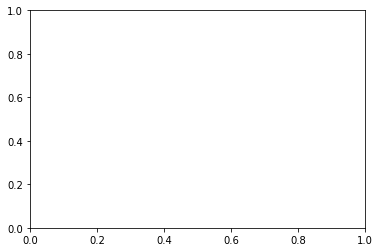

In [35]:
df.boxplot(column='Age')
"""
This returns an error. This column should be cleaned and explored
"""

In [36]:
print(set(df.Age))

{nan, 'Teens', '47', '>50', '28 & 26', '31 or 33', '49', '67', '45', 'adult', '17 & 16', '9 & 12', '66', '3', '5', '58', '1', '55', '17', '20s', ' ', '20?', '23', '18 or 20', '65', '23 & 26', 'mid-20s', '? & 19', '20', '46', '52', '36 & 26', '13 or 18', 'Ca. 33', '6', '13', '13 or 14', '25', '32 & 30', '26', 'Teen', '61', '25 to 35', '77', '"young"', '48', '15', '11', '75', '31', '50s', '2�', '42', 'MAKE LINE GREEN', '60s', '62', '36', '21 & ?', '24', '19', '22', '33 or 37', '9 months', 'teen', '12 or 13', '10', '21, 34,24 & 35', '72', '56', 'Elderly', '71', '70', '86', '40', 'Both 11', '30', '7 or 8', '50', '  ', '21', '38', '30 & 32', '50 & 30', '18 to 22', '10 or 12', '� ', '63', '27', '33 & 26', '68', '16 to 18', '32', '51', '41', '18 months', 'F', '18', "60's", '59', '43', '40s', '28, 23 & 30', '8 or 10', '46 & 34', '33', '9 or 10', '?    &   14', '87', '39', '84', '37, 67, 35, 27,  ? & 27', 'X', '54', '2 to 3 months', 'young', '7      &    31', '34', '25 or 28', '(adult)', '12', 

In [38]:
"""
We can replace some of this data by an average, for instance 50's by 55
"""
df.Age=df.Age.str.replace('0s','5')
print(set(df.Age))

{nan, 'Teens', '47', '>50', '28 & 26', '31 or 33', '49', '67', '45', 'adult', 'mid-35', '17 & 16', '9 & 12', '66', '3', '5', '58', '1', '55', '17', ' ', '20?', '23', '18 or 20', '65', '23 & 26', '? & 19', '20', '46', '52', '36 & 26', '13 or 18', 'Ca. 33', '6', '13', '13 or 14', '25', '32 & 30', '26', 'Teen', '61', '25 to 35', '77', '"young"', '48', '15', '11', '75', '31', '2�', '42', 'MAKE LINE GREEN', '62', '36', '21 & ?', '24', '19', '22', '33 or 37', '9 months', 'teen', '12 or 13', '10', '21, 34,24 & 35', '72', '56', 'Elderly', '71', '70', '86', '40', 'Both 11', '30', '7 or 8', '50', '  ', '21', '38', '30 & 32', '50 & 30', '18 to 22', '10 or 12', '� ', '63', '27', '33 & 26', '68', '16 to 18', '32', '51', '41', '18 months', 'F', '18', "60's", '59', '43', '28, 23 & 30', '8 or 10', '46 & 34', '33', '9 or 10', '?    &   14', '87', '39', '84', '37, 67, 35, 27,  ? & 27', 'X', '54', '2 to 3 months', 'young', '7      &    31', '34', '25 or 28', '(adult)', '12', '69', '30 or 36', '64', '9', 

In [39]:
df.Age=df.Age.str.replace("0's",'5')
print(set(df.Age))

{nan, 'Teens', '47', '>50', '28 & 26', '31 or 33', '49', '67', '45', 'adult', 'mid-35', '17 & 16', '9 & 12', '66', '3', '5', '58', '1', '55', '17', ' ', '20?', '23', '18 or 20', '65', '23 & 26', '? & 19', '20', '46', '52', '36 & 26', '13 or 18', 'Ca. 33', '6', '13', '13 or 14', '25', '32 & 30', '26', 'Teen', '61', '25 to 35', '77', '"young"', '48', '15', '11', '75', '31', '2�', '42', 'MAKE LINE GREEN', '62', '36', '21 & ?', '24', '19', '22', '33 or 37', '9 months', 'teen', '12 or 13', '10', '21, 34,24 & 35', '72', '56', 'Elderly', '71', '70', '86', '40', 'Both 11', '30', '7 or 8', '50', '  ', '21', '38', '30 & 32', '50 & 30', '18 to 22', '10 or 12', '� ', '63', '27', '33 & 26', '68', '16 to 18', '32', '51', '41', '18 months', 'F', '18', '59', '43', '28, 23 & 30', '8 or 10', '46 & 34', '33', '9 or 10', '?    &   14', '87', '39', '84', '37, 67, 35, 27,  ? & 27', 'X', '54', '2 to 3 months', 'young', '7      &    31', '34', '25 or 28', '(adult)', '12', '69', '30 or 36', '64', '9', '21 or 2

In [ ]:
"""
Maybe use RegEx?
"""
# re.sub(r'\w+','dog' 'Words, words, words.')

In [41]:
"""
It could be simpler to discard all lines which do not contain a numerical value.
However let's first identify the lines with a string made of numeric values.
Then we should convert those values to an integer format.
"""
#df=df[df.Age.str.isnumeric()]
df.Age.str.isnumeric()

0       True
1       True
2       True
3        NaN
4        NaN
5        NaN
6       True
7       True
8       True
9       True
10       NaN
11      True
12      True
13      True
14      True
15      True
16      True
17      True
18      True
19      True
20      True
21      True
22       NaN
23      True
24      True
25      True
26      True
27       NaN
28      True
29       NaN
        ... 
5962     NaN
5963     NaN
5964     NaN
5965     NaN
5966    True
5967     NaN
5968     NaN
5969     NaN
5970     NaN
5971     NaN
5972     NaN
5973     NaN
5974     NaN
5975     NaN
5976     NaN
5977     NaN
5978     NaN
5979     NaN
5980     NaN
5981     NaN
5982     NaN
5983     NaN
5984     NaN
5985     NaN
5986     NaN
5987     NaN
5988     NaN
5989     NaN
5990     NaN
5991    True
Name: Age, Length: 5992, dtype: object

In [129]:
"""
Since 45% of this column is empty and the remaining 55% contain many heterogenous formats,
it seems reasonnable to drop this column.
"""
df=df.drop('Age',axis=1)
df.shape

(5992, 20)

In [56]:
print(set(df.Activity))

{nan, '', 'Shark fishing on the Ricardo Astorga', 'Surfing / Wading', 'Fishing / washing bait off hands', 'The MV Dona Marilyn sank in Typhoon Unsang with the loss of 389 lives', 'Playing in the surf with his 2 dogs', 'Spearfishing, but standing in knee-deep water', 'Surfing, but treading water', 'Sea Disaster, sinking of the fishing  launch Mavis', 'Spearfishing, dived to pick up a float line', 'Kiteboarding', 'boat from the Austrian ship Elizabeth', 'Aircaft exploded', 'Netting menhaden, sharks caught in net', 'Paddling on kneeboard', 'Tagging sharks', 'Murder victim', 'Overturned skiff', 'He drowned when boat capsized', 'Standing in water with child in her arms', 'Five men on makeshift raft after their 10 m fishing boat  capsized and sank in rough seas. Survivors rescued after  7.5 hours in the water', 'Fell overboard  from the Taiwanese fishing trawler Lien Cheng Feu', 'Boating', '14 m prawn trawler New Venture capsized  & sank in heavy seas Three people in the water', 'Removing sh

In [130]:
"""
Cleaning up the 'Activity' column. Maybe use RegEx?
"""
import re

df.Activity=df.Activity.apply(lambda x: x if pd.isnull(x) else re.sub(r'.*fish.*', 'fishing', x, flags = re.IGNORECASE))
df.Activity=df.Activity.apply(lambda x: x if pd.isnull(x) else re.sub(r'.*surf.*', 'surfing', x, flags = re.IGNORECASE))
df.Activity=df.Activity.apply(lambda x: x if pd.isnull(x) else re.sub(r'.*swim.*', 'swimming', x, flags = re.IGNORECASE))
df.Activity=df.Activity.apply(lambda x: x if pd.isnull(x) else re.sub(r'.*wad.*', 'swimming', x, flags = re.IGNORECASE))
df.Activity=df.Activity.apply(lambda x: x if pd.isnull(x) else re.sub(r'.*board.*', 'surfing', x, flags = re.IGNORECASE))
df.Activity=df.Activity.apply(lambda x: x if pd.isnull(x) else re.sub(r'.*snork.*', 'swimming', x, flags = re.IGNORECASE))
df.Activity=df.Activity.apply(lambda x: x if pd.isnull(x) else re.sub(r'.*lobst.*', 'fishing', x, flags = re.IGNORECASE))
df.Activity=df.Activity.apply(lambda x: x if pd.isnull(x) else re.sub(r'.*bath.*', 'swimming', x, flags = re.IGNORECASE))
df.Activity=df.Activity.apply(lambda x: x if pd.isnull(x) else re.sub(r'.*sail.*', 'swimming', x, flags = re.IGNORECASE))
df.Activity=df.Activity.apply(lambda x: x if pd.isnull(x) else re.sub(r'.*ship.*', 'swimming', x, flags = re.IGNORECASE))
df.Activity=df.Activity.apply(lambda x: x if pd.isnull(x) else re.sub(r'.*crash.*', 'swimming', x, flags = re.IGNORECASE))
df.Activity=df.Activity.apply(lambda x: x if pd.isnull(x) else re.sub(r'.*boat.*', 'swimming', x, flags = re.IGNORECASE))
df.Activity=df.Activity.apply(lambda x: x if pd.isnull(x) else re.sub(r'.*cruis.*', 'swimming', x, flags = re.IGNORECASE))
df.Activity=df.Activity.apply(lambda x: x if pd.isnull(x) else re.sub(r'.*div.*', 'swimming', x, flags = re.IGNORECASE))
df.Activity=df.Activity.apply(lambda x: x if pd.isnull(x) else re.sub(r'.*accid.*', 'accident', x, flags = re.IGNORECASE))
df.Activity=df.Activity.apply(lambda x: x if pd.isnull(x) else re.sub(r'.*s\Dnk.*', 'accident', x, flags = re.IGNORECASE))
df.Activity=df.Activity.apply(lambda x: x if pd.isnull(x) else re.sub(r'.*torpedo.*', 'accident', x, flags = re.IGNORECASE))
df.Activity=df.Activity.apply(lambda x: x if pd.isnull(x) else re.sub(r'.*canoe.*', 'accident', x, flags = re.IGNORECASE))
df.Activity=df.Activity.apply(lambda x: x if pd.isnull(x) else re.sub(r'.*raft.*', 'accident', x, flags = re.IGNORECASE))
df.Activity=df.Activity.apply(lambda x: x if pd.isnull(x) else re.sub(r'.*standing.*', 'swimming', x, flags = re.IGNORECASE))
print(set(df.Activity))

{nan, 'Rowing', '', '90 European civilians, many women & children, were placed on the deck of a Japanese submarine that submerged when it was well offshore', 'Shark tagging', 'Crouching in the water', 'Catching crabs', 'Treading water while alongside capsized yacht', 'Jumping', 'Attempting to drive shark away from the beach', 'Attempting to drive shark from area', 'Harpooned shark', 'Aircaft exploded', 'Netting menhaden, sharks caught in net', 'Hauling in net', 'Lifesaving drill', 'Adrift after wave swamped engine', 'Tagging sharks', 'Murder victim', 'Overturned skiff', 'Argentine Air Force C-54', 'Unknown', 'Fleeing across a river', "Scientific research (Dr. Sonny Gruber's student)", 'accident', 'The 500-ton coastal trader Polurrian foundered', 'Coming ashore on a hawser', 'Removing shark from a trap', 'Floating in creek', 'Crossing the river', 'Rescuing', 'Attempting to attract dolphins', "Crouching in 2' of water", 'Put foot inside mouth of supposedly dead shark', 'Washing cooking p

In [134]:
"""
Cleaning the other results is fastidious so it seems more effective to describe all
remaining results as 'accident'
"""
df.Activity=df.Activity.apply(lambda x: 'accident' if x not in ['fishing','surfing','swimming'] else x)
#for i,row in df[["Activity"]].iterrows():
 #   if df.Activity[i] not in ['fishing','surfing','swimming']:
  #      df.Activity[i]="accident"
#print(set(df.Activity))

AxesSubplot(0.125,0.125;0.775x0.755)


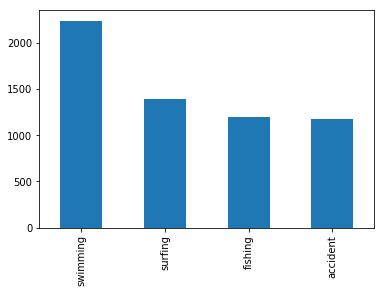

In [136]:
print(df.Activity.value_counts().plot.bar())

"""
At least the data seems more homogenous now (although probably irrelevant)
"""

In [139]:
df.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Injury', 'Fatal (Y/N)', 'Species ',
       'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order'],
      dtype='object')

In [140]:
df1=df[df["Case Number.1"]!=df["Case Number.2"]]
df1
"""
There are very few instances where Case Number.1 and Case Number.2 are different,
so it seems reasonnable to drop one of the 2 columns"""

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Injury,Fatal (Y/N),Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order
4,2016.09.15,16-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Bells Beach,surfing,male,M,No injury: Knocked off board by shark,N,2 m shark,"The Age, 9/16/2016",2016.09.16-BellsBeach.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.16,2016.09.15,5989
33,2016.07.14.4,Reported 14-Jul-2016,2016,Unprovoked,BAHAMAS,NaN,Tiger Beach,swimming,Michael Dornellas,M,Face bruised when partly blind shark collided ...,N,"Lemon shark, 9'","GrindTV, 7/14/2016",2016.07.14.R-TigerBeach.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.07.14.R,2016.07.14.4,5960
97,2016.01.24.b,24-Jan-16,2016,Unprovoked,USA,Texas,Off Surfside,fishing,Keith Love,M,"Bruised ribs & tail bone, speargun broken and ...",N,Bull sharks x 2,K. Love,2016.01.24.b-Love.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2015.01.24.b,2016.01.24.b,5896
116,2015.12.23,07-Nov-15,2015,,USA,Florida,"Paradise Beach, Melbourne, Brevard County",surfing,Ryla Underwood,F,Lower left leg injured,N,Shark involvement not confirmed,"Fox25Orlando, 11/7/2015",2015.11.07-Underwood.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2015.11.07,2015.12.23,5876
121,2015.10.28.a,28-Oct-15,2015,Unprovoked,USA,Hawaii,"Malaka, Oahu",surfing,Raymond Senensi,M,"Lacerations & puncture wounds to right thigh, ...",N,NaN,"Star Advertiser, 10/28/2015",2015.10.28-Senensi.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2015.10.28,2015.10.28.a,5871
3296,1967.07.05,05-Jul-67,1967,Unprovoked,TURKEY,Mugla Province,Kucukada Island,fishing,Gungor Guven,M,FATAL,Y,NaN,"C. Moore, GSAF",1967.07.05-Guven.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1967/07.05,1967.07.05,2697
3569,"1962,08.30.b",30-Aug-62,1962,,TURKEY,Antalya Province,Ucagiz,accident,Occupant: Hasan Olta,M,No injury,N,NaN,"C.Moore, GSAF",1962.08.30.b-pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1962.08.30.b,"1962,08.30.b",2424
3654,1961.09.02.R,Reported 06-Sep-1961,1961,Provoked,ITALY,Venice Province,Chioggia,fishing,Pollione Perrini & Fioravante Perini,M,Left foot & right hand bitten by netted shark ...,N,1 m shark,"C. Moore, GSAF",1961.09.06.R-Chioggia.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,"1961.09,06.R",1961.09.02.R,2339
4177,1952.08.05,05-Aug-52,1952,Provoked,ITALY,Teramo,Giulianova,fishing,Vittorio Speca,NaN,Multiple injuries PROVOKED INCIDENT,Y,2m shark,"C. Moore, GSAF",1952.08.05-Speca.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1952.08.04,1952.08.05,1816
5043,1900.00.00.R,Reported to have taken place in 1919,1919,,ITALY,NaN,Savona,fishing,NaN,M,No injury,N,13' shark,"C. Moore, GSAF",1919.00.00.R-Savona.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1919.00.00.R,1900.00.00.R,950


In [144]:
df=df.drop("Case Number.1",axis=1)
df.columns
"""
Drop done
"""

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Injury', 'Fatal (Y/N)', 'Species ',
       'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.2', 'original order'],
      dtype='object')

In [145]:
df_clean=df

In [146]:
df_clean.to_csv('/Users/timotheeduverne/Documents/GitHub/Test-Tim/data-labs/module-1/pandas-project/your-code/clean_dataframe.csv', index=False)
# index=False deletes the index column before storing the clean dataframe to a csv file